Импорт библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#Задание функций, градиентов и гессианов

fun = $-2x_0^3+4x_0^2+x_1^4-3x_1^3-4x_2^3+2x_2^4-5x_3+x_3^2+10+x_0+x_1+x_2+x_3$

In [ ]:
def fun(x):
    # print(x)
    x0,x1,x2,x3=x
    return -2*x0**3+4*x0**2+x1**4-3*x1**3-4*x2**3+2*x2**4-5*x3+x3**2+10+x0+x1+x2+x3

# Реализация действий с матрицами

In [ ]:
# перемножение числа и вектора
def mult(a, arr):
    return np.array([i*a for i in arr])

# сложение двух векторов
def add(arr1, arr2):
    try:
        return np.array([arr1[i]+arr2[i] for i in range(len(arr1))])
    except TypeError:
        arr1+arr2[0]

# Скалярное произведение
def mydot(arr1, arr2):
    try:
        ans=0
        for i in range(len(arr1)):
            ans+=arr1[i]*arr2[i]
        return ans
    except:
        return arr1*arr2[0]
# взятие нормы вектора
def norm(arr):
    return sum(i**2 for i in arr)**0.5

# реализация численного приближения градиента
def my_grad(f, x, h=1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        xh = x.copy()
        x_h = x.copy()
        xh[i] += h
        x_h[i] -= h
        grad[i] = (f(xh) - f(x_h))/h/2
    return grad

# Реализация метода сопряженных градиентов

In [ ]:
def find_alpha(f, a,b, tol=1e-6, max_iter = 100):
    phi = (1 + 5**0.5) / 2
    resphi = 2 - phi

    x1 = a + resphi * (b - a)        # начальные точки
    x2 = b - resphi * (b - a)
    # print(x1,x2)
    f1 = f(x1)
    f2 = f(x2)
    # print(f1,f2)

    for _ in range(max_iter):
        # print(x1,x2)
        if abs(b - a) < tol:
            break
        # print("f1f2",f1,f2)
        if f1 < f2:
            b, x2, f2 = x2, x1, f1
            x1 = a + resphi * (b - a)
            f1 = f(x1)
        else:
            a, x1, f1 = x1, x2, f2
            x2 = b - resphi * (b - a)
            f2 = f(x2)


    return (a + b) / 2


In [ ]:
def conjugate_gradient5(f, x0, tol=1e-5, max_iter=1000, alpha_max=1.0, c=0.5, rho=0.2, alpha_min=1e-10, max_f = 1e15, end_fun="norm_grad"):
    """
    Метод сопряженных градиентов с backtracking line search.

    Args:
    f: Функция, для которой нужно найти минимум.
    grad_f: Градиент функции.
    x0: Начальная точка поиска.
    tol: Допустимая погрешность.
    max_iter: Максимальное количество итераций.
    alpha_max: Максимальная длина шага.
    c: Параметр для backtracking line search.
    rho: Параметр для backtracking line search.
    alpha_min: Минимальная длина шага.
    max_f: Максимально допустимое значение f, иначе считаем = null.

    Returns:
    ans = {"message", "status", "nit", "x", "f_min": arr_f[-1], "arr_f": arr_f}
    """
    arr_f = [f(x0)]
    x = x0
    r = mult(-1, my_grad(f, x))
    d = r

    ans = {"message": "not enough iterations",
           "status": 3,
           "nit": 0,
           "x": x,
           "f_min": arr_f[-1],
           "arr_f": arr_f}

    for i in range(max_iter):
        ans["nit"]+=1
        alpha = alpha_max
        # Продвинутый поиск по линии с обратным шагом
        while f(add(x, mult(alpha, d))) > f(x) + c * alpha * mydot(my_grad(f, x), d) and alpha > alpha_min:
            alpha *= rho
        # def f_new(alpha): return f(add(x, mult(alpha, d)))
        # alpha = find_alpha(f_new, -c,c,tol)

        if abs(f(x))>=max_f:
            ans["message"] = 'too big f or too small'
            ans["x"], ans["f_min"], ans["arr_f"], ans["status"] = x, arr_f[-1], arr_f, 1
            return ans
        if alpha < alpha_min:  # Если шаг слишком мал, прерываем
            ans["message"] = 'too small alpha'
            ans["x"], ans["f_min"], ans["arr_f"], ans["status"] = x, arr_f[-1], arr_f, 2
            return ans

        x = add(x, mult(alpha, d))
        arr_f.append(f(x))
        r_new = mult(-1, my_grad(f, x))
        beta = mydot(r_new, r_new) / mydot(r, r)
        # beta = norm(r_new)**2 / norm(r)**2
        d = add(r_new, mult(beta, d))
        r = r_new

        # Проверка условия сходимости
        if end_fun=="norm_grad":
            if norm(r) < tol:
                ans["message"] = 'ok'
                ans["status"] = 0
                break
        elif end_fun=="dif_f":
            if len(arr_f)>2:
                if abs(arr_f[-1]-arr_f[-2])<tol:
                    ans["message"] = 'ok'
                    ans["status"] = 0
                    break
        elif end_fun=="norm_f":
            if len(arr_f)>2:
                if (arr_f[-1]-arr_f[-2])**2<tol:
                    ans["message"] = 'ok'
                    ans["status"] = 0
                    break
    print(end_fun)
    ans["x"], ans["f_min"], ans["arr_f"] = x, arr_f[-1], arr_f
    return ans

#Применение метода сопряженных градиентов

## Зависимость решения от начальной точки

In [ ]:
res_arr = []
res_name = []

for i in range(-500,500, 2):
    j=i/10
    fun_x0 = [j,j,j,j]
    res_arr.append(conjugate_gradient5(fun,fun_x0))
    res_name.append(str(i))
    # print(res_arr[-1])
    res_arr[-1]["right_anser"]=minimize(fun, x0=np.array(fun_x0), method='CG')
    res_arr[-1]["x0"] = fun_x0

In [ ]:
print("|--------x0--------|-----------------------x_min-----------------------|--------f_min-------|--nit--|-status-|--message--|----righ_answer_f|--rf_s--|")
for i in range(len(res_arr)):
    n = res_name[i]
    r = res_arr[i]
    x0, x_min, f, arr_f, s, nit, m,rr = r["x0"], r["x"], r["f_min"], r["arr_f"], r["status"],r["nit"],r["message"],r["right_anser"]
    rf, rs = rr["fun"], rr["status"]

    if s==0:    print(f"| {x0} | {x_min} | {f} | {nit} | {s} | {m} | {rf} | {rs} |")

|--------x0--------|-----------------------x_min-----------------------|--------f_min-------|--nit--|-status-|--message--|----righ_answer_f|--rf_s--|
| [-1.0, -1.0, -1.0, -1.0] | [-0.1150692  -0.31235694 -0.26604372  2.00000322] | 5.548828333953454 | 93 | 0 | ok | -2.935681779438237e+202 | 2 |
| [-0.4, -0.4, -0.4, -0.4] | [-0.11506988 -0.3123563  -0.26604435  1.99999606] | 5.548828333956614 | 38 | 0 | ok | 5.548828333939811 | 0 |
| [-0.2, -0.2, -0.2, -0.2] | [-0.11506935 -0.31235616 -0.266044    1.99999668] | 5.548828333951368 | 30 | 0 | ok | 5.548828333963622 | 0 |
| [0.0, 0.0, 0.0, 0.0] | [-0.11506938 -0.31235615 -0.26604471  1.99999603] | 5.548828333955637 | 38 | 0 | ok | 5.548828333952681 | 0 |
| [0.2, 0.2, 0.2, 0.2] | [-0.11506882 -0.3123565  -0.26604404  1.99999613] | 5.548828333956283 | 37 | 0 | ok | 5.5488283339504925 | 0 |
| [0.6, 0.6, 0.6, 0.6] | [-0.11506911  2.19826535  1.43969307  1.99999972] | -2.281788806253899 | 155 | 0 | ok | -2.2817888062561047 | 0 |
| [1.0, 1.0, 1.0,

везде, где мой метод завершился усешно, встроенный метод тоже завершился успешно (крме первой строки), значение минимума совпадает с моей функцией

## Зависимость решения от длины шага при точности = 0,0001

In [ ]:
res_arr = []
res_name = []
fun_x0 = [0,0,0,0]
# fun_x0 = [3,3,3,3]
for i in range(1,100, 1):
    rho = i/100
    res_arr.append(conjugate_gradient5(fun,fun_x0, rho=rho,tol=0.0001))
    res_name.append(str(i))
    # print(res_arr[-1])
    res_arr[-1]["right_anser"]=minimize(fun, x0=np.array(fun_x0), method='CG')
    res_arr[-1]["rho"] = rho


In [ ]:
print("|--rho--|-----------------------x_min-----------------------|--------f_min-------|--nit--|-status-|--message--|")
rho_res=[]
nit_res=[]
for i in range(len(res_arr)):
    n = res_name[i]
    r = res_arr[i]
    rho, x_min, f, arr_f, s, nit, m,rr = r["rho"], r["x"], r["f_min"], r["arr_f"], r["status"],r["nit"],r["message"],r["right_anser"]

    if s==0:
        print(f"| {rho} | {x_min} | {f} | {nit} | {s} | {m} |")
        rho_res.append(rho)
        nit_res.append(nit)

|--rho--|-----------------------x_min-----------------------|--------f_min-------|--nit--|-status-|--message--|
| 0.01 | [-0.11507229 -0.31236085 -0.26604072  1.99996129] | 5.548828335607434 | 75 | 0 | ok |
| 0.02 | [-0.11507221 -0.31236063 -0.26604087  1.99995915] | 5.548828335763722 | 51 | 0 | ok |
| 0.03 | [-0.11507223 -0.31235974 -0.26604125  1.99996563] | 5.54882833524286 | 41 | 0 | ok |
| 0.04 | [-0.11507193 -0.31235985 -0.26604133  1.99995708] | 5.54882833589639 | 34 | 0 | ok |
| 0.05 | [-0.11507217 -0.31235934 -0.26604144  1.99996205] | 5.548828335486941 | 30 | 0 | ok |
| 0.06 | [-0.11507229 -0.31235888 -0.2660416   1.99996574] | 5.548828335210838 | 27 | 0 | ok |
| 0.07 | [-0.11507199 -0.31235924 -0.2660416   1.99995727] | 5.548828335862352 | 24 | 0 | ok |
| 0.08 | [-0.11507219 -0.31235927 -0.26604154  1.99995763] | 5.548828335838968 | 22 | 0 | ok |
| 0.09 | [-0.11507217 -0.31235759 -0.26604231  1.9999716 ] | 5.548828334809356 | 21 | 0 | ok |
| 0.1 | [-0.11507289 -0.31235933 -0

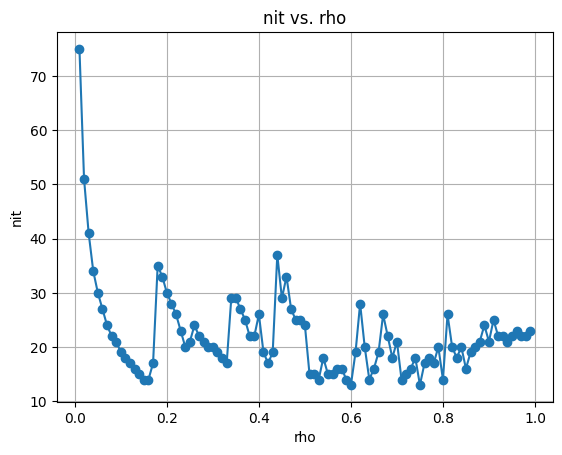

In [ ]:
plt.plot(rho_res, nit_res, marker='o', linestyle='-')
plt.xlabel("rho")
plt.ylabel("nit")
plt.title("nit vs. rho")
plt.grid(True)
plt.show()

## Зависимость точности от выбранного метода остановки

In [ ]:
res_arr3 = []
res_name3 = []

stop_fun= ["norm_grad","norm_f","dif_f"]
fun_x0=[0.0,0.0,0.0,0.0]
for i in stop_fun:
    res_arr3.append(conjugate_gradient5(fun,fun_x0,tol=1e-7,rho=0.4,end_fun=i))
    res_name3.append(str(i))
    # print(res_arr3[-1])
    res_arr3[-1]["x0"] = fun_x0
print(minimize(fun, x0=np.array(fun_x0), method='CG'))
    #res_arr3[-1]["x0"] = fun_x0

norm_grad
norm_f
dif_f
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 5.548828333952681
       x: [-1.151e-01 -3.124e-01 -2.660e-01  2.000e+00]
     nit: 11
     jac: [-9.537e-07  1.669e-06  3.338e-06  7.033e-06]
    nfev: 110
    njev: 22


In [ ]:
ii=0
for i in res_arr3:
    print("_"*30)
    print(res_name3[ii])
    ii+=1
    print("_"*30)
    for j in i:
        print(j, i[j])

______________________________
norm_grad
______________________________
message ok
status 0
nit 22
x [-0.11506929 -0.31235628 -0.26604444  1.99999997]
f_min 5.54882833393948
arr_f [10.0, 7.51083008006254, 5.9927043200393255, 5.613817240341959, 5.557861617140304, 5.55095477131535, 5.549281353067114, 5.548904987455752, 5.548842508550054, 5.548831088341934, 5.548828840428938, 5.548828438093741, 5.548828350747011, 5.5488283375685095, 5.5488283345412235, 5.548828334052852, 5.548828333960764, 5.548828333943317, 5.54882833394025, 5.548828333939622, 5.548828333939506, 5.548828333939486, 5.54882833393948]
x0 [0.0, 0.0, 0.0, 0.0]
______________________________
norm_f
______________________________
message ok
status 0
nit 8
x [-0.11536704 -0.31233456 -0.26557075  1.99641519]
f_min 5.548842508550054
arr_f [10.0, 7.51083008006254, 5.9927043200393255, 5.613817240341959, 5.557861617140304, 5.55095477131535, 5.549281353067114, 5.548904987455752, 5.548842508550054]
x0 [0.0, 0.0, 0.0, 0.0]
_____________